In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Library**

In [2]:
# data analysisling
import pandas as pd
import numpy as np

In [3]:
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [4]:
#Splitter
from sklearn.model_selection import train_test_split

In [5]:
#metrics
from sklearn import metrics

In [6]:
#ML algoprithms
from sklearn. ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# **Import Dataset**

In [7]:
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')

In [8]:
data = [train_df,test_df]

In [9]:
#data

In [10]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [16]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [18]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Baclini, Miss. Eugenie",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [19]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [20]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().sort_values(by='Survived',ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [21]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [23]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=True).mean().sort_values(by='Survived',ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [24]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=True).mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


# **Analysing by Vizualing Data**

**Correlation Numerical feature**

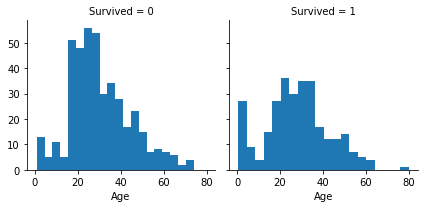

In [25]:
#feature:Age and Target:Survived
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

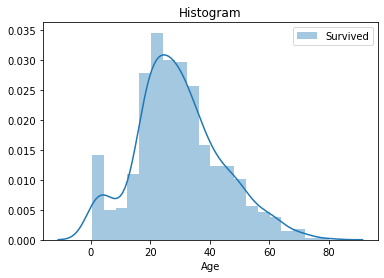

In [26]:
# Histograms for each species
#sns.distplot(a=train_df['Survived'], label="Age", kde=False)
sns.distplot(a=train_df['Age'], label="Survived", kde=True)
# Add title
plt.title("Histogram")

# Force legend to appear
plt.legend()



In [27]:
res=[]
for i in train_df["Age"].sort_values().unique():
    s=train_df["Age"].loc[train_df["Age"]==i].sum()/i
    #print(i,"     ",s)
    part_train_df=train_df.loc[train_df["Survived"]==1]
    ps=part_train_df["Age"].loc[train_df["Age"]==i].sum()/i
    #print(i,"    ",ps/s)
    res=res+[[i,ps/s]]

In [28]:
part_train=pd.DataFrame(res,columns=["Age","Survived"])

In [29]:
res=[]
for i in train_df["Age"].sort_values().unique():
    s=train_df["Age"].loc[train_df["Age"]==i].sum()/i
    #print(i,"     ",s)
    part_train_df=train_df.loc[train_df["Survived"]==1]
    ps=part_train_df["Age"].loc[train_df["Age"]==i].sum()/i
    #print(i,"    ",ps/s)
    res=res+[[i,ps,s]]
part_train=pd.DataFrame(res,columns=["Age","Alive","Survived"])
part=[]
#for i in range(5,train_df["Age"].max()+6,5):
p1=part_train.loc[part_train["Age"]<5]
part=part+[[str(5-5)+"-"+str(5),p1["Alive"].sum(),p1["Survived"].sum()]]
part

[['0-5', 27.0, 40.0]]

In [30]:
m=train_df["Age"].max()+7
part=[]
for i in range(5,int(m),5):
    p1=part_train.loc[part_train["Age"]>i-5]
    p1=p1.loc[part_train["Age"]<i]
    part=part+[[str(i-5)+"-"+str(i),p1["Alive"].sum(),p1["Survived"].sum()]]
part_df=[]
for i in part:
    part_df=part_df+[i+[i[1]/i[2]]]
part_df

<ipython-input-30-50bb3a8aa7ef>:9: RuntimeWarning: invalid value encountered in double_scalars
  part_df=part_df+[i+[i[1]/i[2]]]


[['0-5', 27.0, 40.0, 0.675],
 ['5-10', 7.0, 18.0, 0.3888888888888889],
 ['10-15', 7.0, 14.0, 0.5],
 ['15-20', 30.0, 81.0, 0.37037037037037035],
 ['20-25', 36.0, 99.0, 0.36363636363636365],
 ['25-30', 32.0, 83.0, 0.3855421686746988],
 ['30-35', 30.0, 70.0, 0.42857142857142855],
 ['35-40', 22.0, 54.0, 0.4074074074074074],
 ['40-45', 12.0, 35.0, 0.34285714285714286],
 ['45-50', 11.0, 29.0, 0.3793103448275862],
 ['50-55', 9.0, 22.0, 0.4090909090909091],
 ['55-60', 5.0, 14.0, 0.35714285714285715],
 ['60-65', 4.0, 11.0, 0.36363636363636365],
 ['65-70', 0.0, 1.0, 0.0],
 ['70-75', 0.0, 4.0, 0.0],
 ['75-80', 0.0, 0.0, nan],
 ['80-85', 0.0, 0.0, nan]]

In [31]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

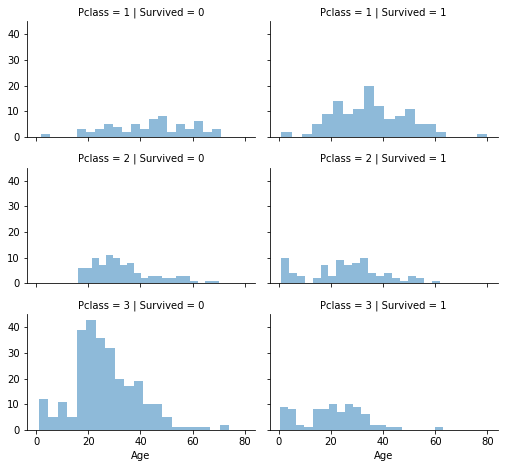

In [32]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\pc\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


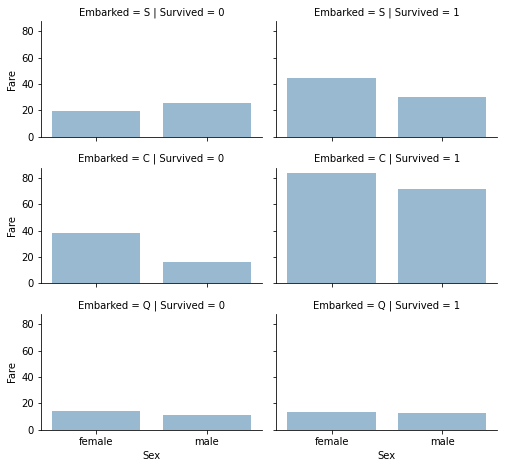

In [33]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
## Standardizing numeric features
train_dfs = train_df.loc[:,['Pclass', 'SibSp', 'Fare']]
train_df_std = (train_dfs - train_dfs.mean())/train_dfs.std()                     

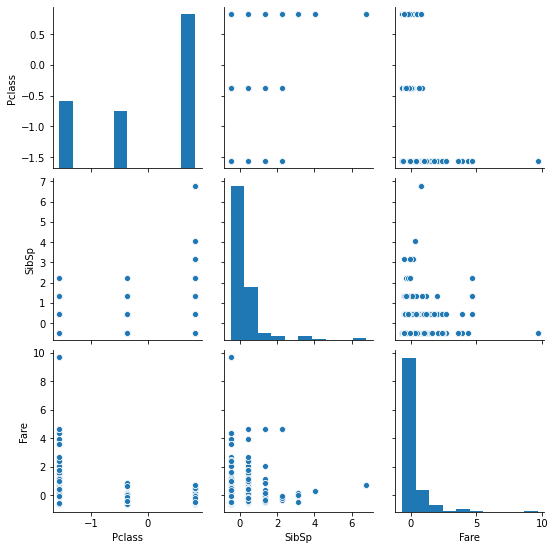

In [36]:
ax = sns.pairplot(train_df_std)

In [37]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
#train_df['Age']

In [39]:
#train_df.pop('Age')

In [40]:
#ax = sns.distplot(train_df.pop('Age'))

In [41]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [42]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Baclini, Miss. Eugenie",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [43]:
#train_df.info()

In [44]:
#test_df.info()

In [45]:
#train_df.head(5)

In [46]:
#test_df.head(5)

In [47]:
train_df=train_df.drop(['Ticket','Cabin','PassengerId','Name'],axis=1)
test_df=test_df.drop(['Ticket','Cabin','Name'],axis=1)

In [48]:
data=[train_df,test_df]

In [49]:
(train_df.shape,test_df.shape)

((891, 8), (418, 8))

In [50]:
train_df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [51]:
for df in data:
    df['Sex']=df['Sex'].map({'male':1,'female':0})

In [52]:
data

[     Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
 0           0       3    1  22.0      1      0   7.2500        S
 1           1       1    0  38.0      1      0  71.2833        C
 2           1       3    0  26.0      0      0   7.9250        S
 3           1       1    0  35.0      1      0  53.1000        S
 4           0       3    1  35.0      0      0   8.0500        S
 ..        ...     ...  ...   ...    ...    ...      ...      ...
 886         0       2    1  27.0      0      0  13.0000        S
 887         1       1    0  19.0      0      0  30.0000        S
 888         0       3    0   NaN      1      2  23.4500        S
 889         1       1    1  26.0      0      0  30.0000        C
 890         0       3    1  32.0      0      0   7.7500        Q
 
 [891 rows x 8 columns],
      PassengerId  Pclass  Sex   Age  SibSp  Parch      Fare Embarked
 0            892       3    1  34.5      0      0    7.8292        Q
 1            893       3    0  47.0     

In [53]:
#train_df.mode()
#train_df.median()
(train_df["Age"].median(),test_df["Age"].median())

(28.0, 27.0)

In [54]:
train_df["Age"].fillna(round(train_df["Age"].median()),inplace=True)
test_df["Age"].fillna(round(train_df["Age"].median()),inplace=True)

In [55]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [56]:
train_df["Embarked"].fillna(train_df['Embarked'].mode()[0],inplace=True)
test_df["Embarked"].fillna(train_df['Embarked'].mode()[0],inplace=True)

In [57]:
test_df['Fare'].fillna(train_df['Fare'].median(),inplace=True)

In [58]:
data=[train_df,test_df]

In [59]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [60]:
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [61]:
for df in data:
    df['Embarked']=df['Embarked'].map({"C":0,"Q":1,"S":2})

In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [63]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [64]:
#for i in list(train_df.columns):
#    print(train_df[i].unique())

In [65]:
X=train_df.drop(["Survived"],axis=True)
y=train_df["Survived"]

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [67]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [68]:
#RandomForestClassifier
res=[]
clf=[]
for i in range(8,99):
#for i in range(80,99):
    rf=RandomForestClassifier(n_estimators=i,random_state=45)
    rf.fit(X_train,y_train)
    y_train_pred=rf.predict(X_train)
    y_pred=rf.predict(X_test)
    res=res+[[i,metrics.accuracy_score(y_train,y_train_pred)*100,metrics.accuracy_score(y_test,y_pred)*100]]
    clf=rf

In [69]:
res=pd.DataFrame(res,columns=['Number','Train','Test'])

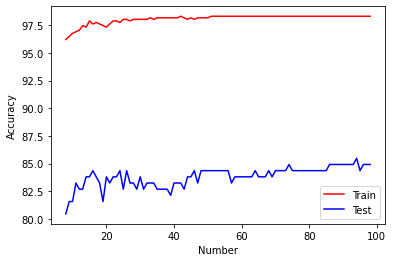

In [70]:
colors = itertools.cycle(["r", "b"])
plt.plot(res['Number'],res['Train'], color=next(colors),label='Train')
plt.plot(res['Number'],res['Test'], color=next(colors),label='Test')
plt.xlabel('Number')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.show()

In [71]:
res.loc[res['Test']==res['Test'].max()]

,Number,Train,Test
86,94,98.314607,85.47486


In [72]:
res.loc[res['Test']>82]

,Number,Train,Test
3,11,96.910112,83.240223
4,12,97.050562,82.681564
5,13,97.471910,82.681564
6,14,97.331461,83.798883
7,15,97.893258,83.798883
...,...,...,...
86,94,98.314607,85.474860
87,95,98.314607,84.357542
88,96,98.314607,84.916201
89,97,98.314607,84.916201


In [73]:
clf=GradientBoostingClassifier(random_state=0,max_depth=5)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 88.26815642458101


In [74]:
metrics.confusion_matrix(y_test,y_pred)

array([[106,  11],
       [ 10,  52]], dtype=int64)

In [75]:
X_test_df=test_df.drop("PassengerId",axis=1).copy()

In [76]:
X_test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [77]:
y_test_df=clf.predict(X_test_df)

In [78]:
submission=pd.DataFrame({'PassengerId':test_df["PassengerId"],"Survived":y_test_df})
submission.to_csv("titanic/TitanicPrediction1.csv",index=False)